# 1. Import Packages

In [1]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
#set the dataset path
data_dir = "/kaggle/input/corn-or-maize-leaf-disease-dataset/data"


In [4]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [5]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [6]:
print(training_set.class_names)  # Displays all the class names
print(len(training_set.class_names))  # Prints the number of classes


['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
4


In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))



In [11]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# -------------------- Training --------------------
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

corn_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[early_stopping]
)

#training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 198ms/step - accuracy: 0.4638 - loss: 1.3722 - val_accuracy: 0.7754 - val_loss: 0.5275
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7965 - loss: 0.4941 - val_accuracy: 0.8375 - val_loss: 0.3779
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8372 - loss: 0.4033 - val_accuracy: 0.7981 - val_loss: 0.4605
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8497 - loss: 0.3669 - val_accuracy: 0.8734 - val_loss: 0.2834
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8788 - loss: 0.2778 - val_accuracy: 0.8459 - val_loss: 0.3937
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8882 - loss: 0.2702 - val_accuracy: 0.8901 - val_loss: 0.2814
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9082 - loss: 0.2325 - val_accuracy: 0.8590 - val_loss: 0.3811
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9026 - loss: 0.2304 - val_ac

In [15]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9230 - loss: 0.1827
Training accuracy: 0.9268875122070312


In [16]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8721 - loss: 0.2939
Validation accuracy: 0.8781362175941467


In [17]:
# Get class names
class_names = training_set.class_names
n_classes = len(class_names)
print(f"Number of Classes: {n_classes}, Class Names: {class_names}")


Number of Classes: 4, Class Names: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [18]:
cnn.save('/kaggle/working/corn_model.keras')

In [19]:
corn_history.history #Return Dictionary of history

{'accuracy': [0.6177260279655457,
  0.8087137937545776,
  0.8424351215362549,
  0.8633244037628174,
  0.8812294602394104,
  0.8946583271026611,
  0.9056997895240784,
  0.9137570858001709,
  0.9245001673698425,
  0.945986270904541],
 'loss': [0.928460955619812,
  0.4646802842617035,
  0.38636037707328796,
  0.33487915992736816,
  0.2797677218914032,
  0.2591947317123413,
  0.2379578948020935,
  0.20874324440956116,
  0.19126452505588531,
  0.152959406375885],
 'val_accuracy': [0.7753883004188538,
  0.8375149369239807,
  0.7980884313583374,
  0.8733572363853455,
  0.8458781242370605,
  0.8900836110115051,
  0.8590202927589417,
  0.8781362175941467,
  0.882915198802948,
  0.8912783861160278],
 'val_loss': [0.5274870991706848,
  0.3778817355632782,
  0.4604712128639221,
  0.2834489345550537,
  0.3936788737773895,
  0.28139421343803406,
  0.38105085492134094,
  0.2796947956085205,
  0.3337682783603668,
  0.28981178998947144]}

In [20]:
import json
with open('/kaggle/working/corn_model.json','w') as f:
  json.dump(corn_history.history,f)

In [21]:
print(corn_history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


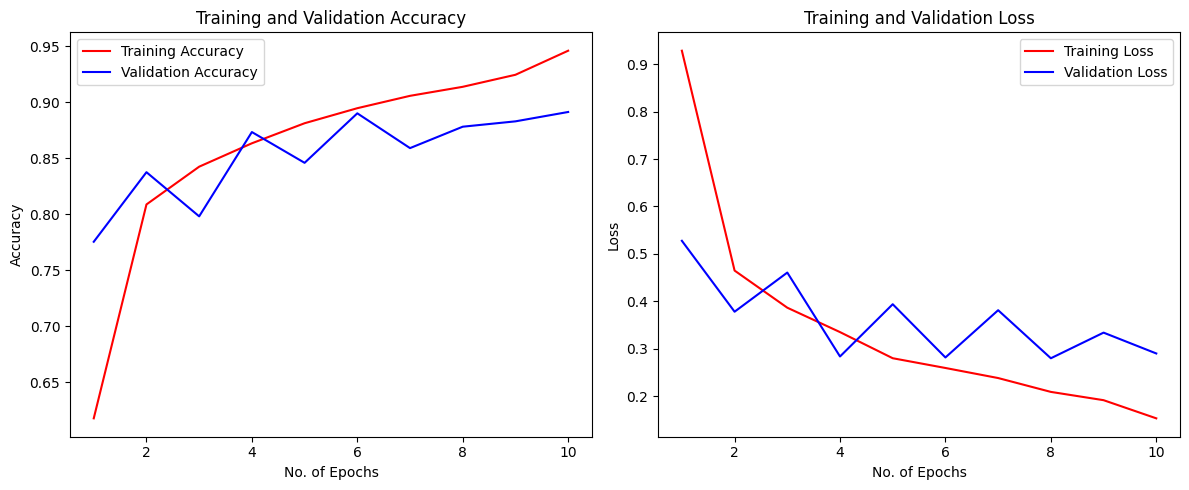

In [23]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Now we have 10 epochs

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting training and validation accuracy on the first subplot
axes[0].plot(epochs, corn_history.history['accuracy'], color='red', label='Training Accuracy')
axes[0].plot(epochs, corn_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
axes[0].set_xlabel('No. of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Plotting training and validation loss on the second subplot
axes[1].plot(epochs, corn_history.history['loss'], color='red', label='Training Loss')
axes[1].plot(epochs, corn_history.history['val_loss'], color='blue', label='Validation Loss')
axes[1].set_xlabel('No. of Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [24]:
test_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=123,
    validation_split=0.1,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4188 files belonging to 4 classes.
Using 418 files for validation.


In [25]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

418/418 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [26]:
true_indices = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_indices, axis=1)

In [27]:
Y_true

<tf.Tensor: shape=(418,), dtype=int64, numpy=
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [28]:
predicted_categories

<tf.Tensor: shape=(418,), dtype=int64, numpy=
array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [30]:
class_name = validation_set.class_names

In [31]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

ValueError: Number of classes, 1, does not match size of target_names, 4. Try specifying the labels parameter

In [35]:
cnn.save('/kaggle/working/corn_model.h5')